# Übung 1a)

Embeddings

In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import callbacks
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [5]:
import io

df = pd.read_csv(io.StringIO(uploaded['titanic.csv'].decode('utf-8')))
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
df = df[df.cabin.notnull()]

Zuerst führe ich ein Label Encoding auf der Spalte Cabin durch. Die Spalte hat insgesamt 186 unterschiedliche Werte.

In [0]:
lbl_enc = preprocessing.LabelEncoder()
df["cabin_enc"] = lbl_enc.fit_transform(df["cabin"].fillna("-1").astype(str).values)

In [16]:
NUM_UNIQUE_VALUES = int(df.cabin_enc.nunique())
print(NUM_UNIQUE_VALUES)

186


Ich möchte 2 dimensionale Embeddings im Anschluss haben.

In [0]:
EMBED_DIM = 2

In [0]:
inp = layers.Input(shape=(1,))
out = layers.Embedding(NUM_UNIQUE_VALUES, EMBED_DIM, name="cabin")(inp)
out = layers.Flatten()(out)
out = layers.Dense(20, activation="relu")(out)
out = layers.Dense(10, activation="relu")(out)
out = layers.Dense(1)(out)

In [0]:
model = Model(inp, out)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
cabin (Embedding)            (None, 1, 2)              372       
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 653
Trainable params: 653
Non-trainable params: 0
_______________________________________________________________

Die Input und Outputvariablen wandle ich noch zu einem Numpy Array um.

In [0]:
X_train = df['cabin_enc'].to_numpy()
y_train = df['survived'].to_numpy()

In [0]:
rlr = callbacks.ReduceLROnPlateau(monitor='mse', factor=0.5, patience=3, min_lr=1e-6, mode='max', verbose=1) 

Ich fitte nun das Modell 100 Epochen mit der MSE Lossfunction und dem Adamoptimizer.

In [19]:
model.compile(loss = "mse", optimizer = "adam", metrics=["mse"])
model.fit(X_train, y_train, epochs = 100, batch_size = 256, callbacks=[rlr])

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6547 - mse: 0.6547 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6458 - mse: 0.6458 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6372 - mse: 0.6372 - lr: 0.0010
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6235 - mse: 0.6235
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2/2 [==============================] - 0s 3ms/step - loss: 0.6285 - mse: 0.6285 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6203 - mse: 0.6203 - lr: 5.0000e-04
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6160 - mse: 0.6160 - lr: 5.0000e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6136 - mse: 0.6136
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2/2 [==============================] -

Hier lasse ich mir nun die 2 dimensionalen Embeddings anzeigen:

In [20]:
embs = model.get_layer("cabin").get_weights()[0]
print(embs)

[[ 1.01056844e-02 -9.07897577e-03]
 [-8.02470744e-03  3.20438645e-03]
 [-4.91258688e-02  1.52684217e-02]
 [ 2.51664445e-02  3.22822407e-02]
 [-3.43073495e-02 -2.06822138e-02]
 [-2.29047555e-02  1.84141807e-02]
 [-2.74149030e-02  1.19980406e-02]
 [ 2.38940469e-03  4.02955599e-02]
 [-4.00205590e-02  8.97234865e-03]
 [ 1.01123489e-02 -3.20488103e-02]
 [ 2.08947938e-02  6.00879872e-03]
 [-4.19120416e-02  1.37008792e-02]
 [ 2.10849028e-02 -8.14164057e-03]
 [ 7.56922597e-03 -3.06215063e-02]
 [ 3.24234404e-02 -1.10271536e-02]
 [ 3.90105322e-02 -3.09144631e-02]
 [ 3.46128419e-02  8.88528489e-03]
 [-2.02657981e-03 -3.65962572e-02]
 [ 2.90029999e-02  3.83580178e-02]
 [-1.02682542e-02  1.89076979e-02]
 [-3.06754000e-02  2.38042064e-02]
 [ 5.47744147e-02 -3.39064077e-02]
 [ 3.00835744e-02  1.78662445e-02]
 [ 8.52268748e-03 -3.21485028e-02]
 [ 2.66541354e-02 -1.49262128e-02]
 [ 5.22828382e-03 -4.38472489e-03]
 [ 4.79239486e-02  2.67795753e-02]
 [-1.17148068e-02  2.91758310e-02]
 [-6.76712894e-04 -2

In dem Plot kann man nun sehr gut die Lage der unterschiedlichen Werte von Cabin erkennen.

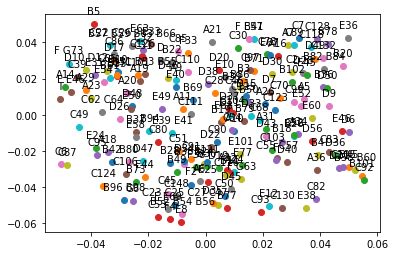

In [22]:
labels = df[["cabin", "cabin_enc"]].drop_duplicates().sort_values("cabin_enc").reset_index(drop=True)

for i,e in enumerate(embs):
    plt.scatter(e[0], e[1])
    plt.annotate(labels.loc[i, "cabin"], (e[0], e[1]), textcoords="offset points", xytext=(0,10), ha='center') 

Nun embedden wir noch die Spalte Fare. Diese hat 112 unterschiedliche Werte vorzuweisen. Das Modell lasse ich gleich wie oben bei der Spalte Cabin.

In [0]:
df["fare_enc"] = lbl_enc.fit_transform(df["fare"].fillna("-1").astype(str).values)

In [33]:
NUM_UNIQUE_VALUES = int(df.fare_enc.nunique())
print(NUM_UNIQUE_VALUES)

112


In [0]:
inp = layers.Input(shape=(1,))
out = layers.Embedding(NUM_UNIQUE_VALUES, EMBED_DIM, name="fare")(inp)
out = layers.Flatten()(out)
out = layers.Dense(20, activation="relu")(out)
out = layers.Dense(10, activation="relu")(out)
out = layers.Dense(1)(out)

In [0]:
model = Model(inp, out)

In [0]:
X_train = df['fare_enc'].to_numpy()
y_train = df['survived'].to_numpy()

In [0]:
rlr2 = callbacks.ReduceLROnPlateau(monitor='mse', factor=0.5, patience=3, min_lr=1e-6, mode='max', verbose=1) 

In [38]:
model.compile(loss = "mse", optimizer = "adam", metrics=["mse"])
model.fit(X_train, y_train, epochs = 100, batch_size = 256, callbacks=[rlr2])

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6597 - mse: 0.6597 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6405 - mse: 0.6405 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6258 - mse: 0.6258 - lr: 0.0010
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6077 - mse: 0.6077
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2/2 [==============================] - 0s 3ms/step - loss: 0.6119 - mse: 0.6119 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5983 - mse: 0.5983 - lr: 5.0000e-04
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - lr: 5.0000e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5858 - mse: 0.5858
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2/2 [==============================] -

In [39]:
embs = model.get_layer("fare").get_weights()[0]
print(embs)

[[-0.02243841  0.02830705]
 [ 0.02166913 -0.00098514]
 [ 0.03208362  0.04203747]
 [-0.00842522 -0.01358726]
 [-0.01515484 -0.02948173]
 [ 0.00955185 -0.03698603]
 [-0.02791655  0.03501472]
 [-0.02873525 -0.03194487]
 [ 0.02934762  0.0287675 ]
 [-0.01079593 -0.02182103]
 [ 0.00636415  0.01637666]
 [ 0.03705027  0.04191799]
 [ 0.01291451  0.02181693]
 [-0.03947322 -0.03109782]
 [-0.02562679  0.03315868]
 [ 0.05514194  0.0389438 ]
 [ 0.02280971  0.02313427]
 [ 0.04769029  0.04475231]
 [-0.01111137  0.0339169 ]
 [-0.04125158 -0.02057509]
 [ 0.05258602  0.04103045]
 [ 0.01209492 -0.04008327]
 [ 0.04446404  0.04081645]
 [ 0.02594912  0.02880995]
 [ 0.00673935 -0.00271311]
 [-0.01034968  0.01650477]
 [-0.00115643 -0.01054119]
 [-0.03812754  0.00155041]
 [ 0.01733509  0.01197911]
 [-0.01095105  0.01200057]
 [-0.0169543  -0.02360277]
 [-0.02545916 -0.00236752]
 [ 0.00377528  0.00357884]
 [ 0.05526913  0.01883292]
 [ 0.03129097 -0.02949278]
 [ 0.03275504 -0.02166162]
 [-0.01311346  0.03289327]
 

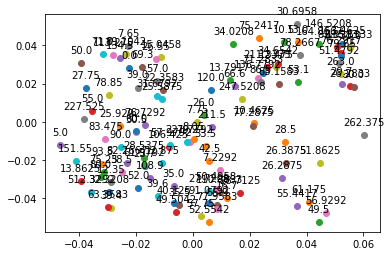

In [40]:
labels = df[["fare", "fare_enc"]].drop_duplicates().sort_values("fare_enc").reset_index(drop=True)

for i,e in enumerate(embs):
    plt.scatter(e[0], e[1])
    plt.annotate(labels.loc[i, "fare"], (e[0], e[1]), textcoords="offset points", xytext=(0,10), ha='center') 